In [1]:
# Packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler

%matplotlib notebook
sns.set_style("darkgrid")

In [2]:
# Loading dataset.
with open('session_tbs_list_all.pickle', 'rb') as handle:
    my_list = pickle.load(handle)

fn = 'session_start_end_time_top_rnti.pickle'
with open(fn, 'rb') as handle:
    df_session = pickle.load(handle)

In [3]:
# Removing NaNs or empty values from the initial dataset
dataset = []
for sess in my_list:
    if len(sess) != 0:
        if ~np.isnan(np.sum(sess)):
            dataset.append(sess)

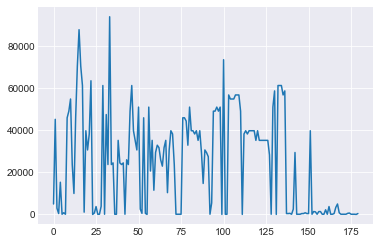

In [4]:
# Figure: plotting an example session trace
plt.figure()
plt.plot(my_list[1172])

In [5]:
#  Extracting features: session length, avg_tbs, std_tbs, total sent TBS
# Building a py list with session lengths (number of samples)
sess_length = []
sess_avg_tbs = []
sess_std_tbs = []
sess_tot_tbs = []
sess_med_tbs = []
sess_skew_tbs = []  #  measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
sess_kurtosis_tbs = [] # measure of the "tailedness" of the probability distribution of a real-valued random variable
sess_min_tbs = []
sess_max_tbs = []
sess_var_tbs = []
sess_perc_10 = []
sess_perc_20 = []
sess_perc_30 = []
sess_perc_40 = []
sess_perc_50 = []
sess_perc_60 = []
sess_perc_70 = []
sess_perc_80 = []
sess_perc_90 = []

for sess in dataset:
    sess_length.append(len(sess))
    sess_avg_tbs.append(np.mean(sess))
    sess_std_tbs.append(np.std(sess))
    sess_tot_tbs.append(sum(sess))
    sess_med_tbs.append(np.median(sess))
    sess_skew_tbs.append(skew(sess))
    sess_kurtosis_tbs.append(kurtosis(sess))
    sess_min_tbs.append(np.min(sess))
    sess_max_tbs.append(np.max(sess))
    sess_var_tbs.append(np.var(sess))
    sess_perc_10.append(np.percentile(sess, 10))
    sess_perc_20.append(np.percentile(sess, 20))
    sess_perc_30.append(np.percentile(sess, 30))
    sess_perc_40.append(np.percentile(sess, 40))
    sess_perc_50.append(np.percentile(sess, 50))
    sess_perc_60.append(np.percentile(sess, 60))
    sess_perc_70.append(np.percentile(sess, 70))
    sess_perc_80.append(np.percentile(sess, 80))
    sess_perc_90.append(np.percentile(sess, 90))
    
# Creating the dataFrame
features = {'sess_length': sess_length, 'sess_avg_tbs': sess_avg_tbs, 'sess_std_tbs':sess_std_tbs, 
            'sess_tot_tbs':sess_tot_tbs, 'sess_med_tbs':sess_med_tbs, 'sess_skew_tbs':sess_skew_tbs, 'sess_kurtosis_tbs':sess_kurtosis_tbs,
           'sess_min_tbs':sess_min_tbs, 'sess_max_tbs':sess_max_tbs, 'sess_var_tbs':sess_var_tbs, 'sess_perc_10':sess_perc_10, 'sess_perc_20':sess_perc_20,
           'sess_perc_30':sess_perc_30, 'sess_perc_40':sess_perc_40, 'sess_perc_50':sess_perc_50, 'sess_perc_60':sess_perc_60, 'sess_perc_70':sess_perc_70,
           'sess_perc_80':sess_perc_80, 'sess_perc_90':sess_perc_90}
df_features = pd.DataFrame(data=features)
    

## __PLOTTING__

Text(0.5,1,'Average length:46.56')

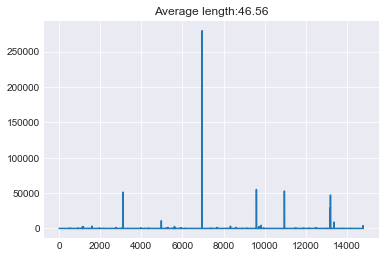

In [6]:
# Figure: plotting the length of each session
plt.figure()
plt.plot(sess_length)
plt.title('Average length:'+ str(round(np.mean(sess_length),2 ) ) )

# histogram
#plt.figure()
#plt.hist(sess_length, range=(np.min(sess_length), np.max(sess_length) ) )
#plt.title('Average length:'+ str(round(np.mean(sess_length),2 ) ) )


Text(0.5,1,'Average TBS:14890.0')

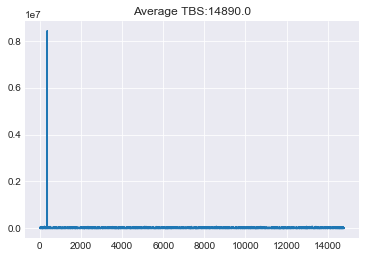

In [7]:
# Figure: plotting the Transpot Block Size (Packet size) -> Data rate
plt.figure()
plt.plot(sess_avg_tbs)
plt.title('Average TBS:'+ str(round(np.mean(sess_avg_tbs) ) ) )

# histogram
#plt.figure()
#plt.hist(sess_avg_tbs, range=(np.min(sess_avg_tbs), np.max(sess_avg_tbs) ) )
#plt.title('Average TBS:'+ str(round(np.mean(sess_avg_tbs) ) ) )

Text(0.5,1,'Average TBS:1361.0')

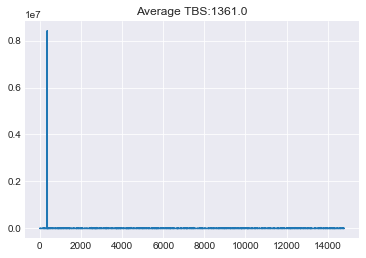

In [8]:
# Figure: plotting the std TBS
plt.figure()
plt.plot(sess_std_tbs)
plt.title('Average TBS:'+ str(round(np.mean(sess_std_tbs) ) ) )

Text(0.5,1,'Average TBS:387059.0')

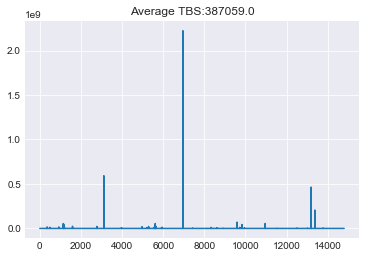

In [9]:
# Figure: plotting the total sent TBS
plt.figure()
plt.plot(sess_tot_tbs)
plt.title('Average TBS:'+ str(round(np.mean(sess_tot_tbs) ) ) )

## __CLUSTERING__

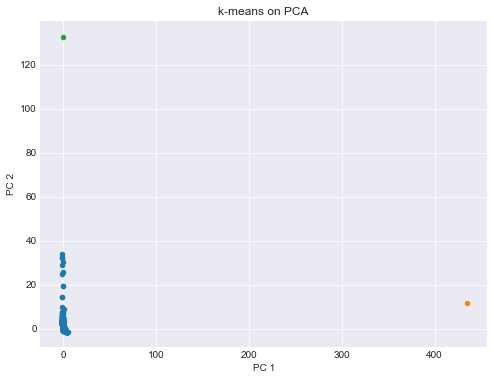

In [10]:
# Computing k-means on the feature vector
#df_subs = df_features.drop(df_features.index[360])

# Standardizing the features
x = StandardScaler().fit_transform(df_features)
#x = df_features

# k-means
num_cluster = 3
est = KMeans(n_clusters=num_cluster)
est.fit(x)
df_features['labels'] = est.labels_

# Computing k-means on PCA over the feature vector

# PCA
#x = df_features
n_comps = 9
pca = PCA(n_components=n_comps)
principalComponents = pca.fit_transform(x)
cols = ['pc' + str(ind+1) for ind in range(n_comps)]
df_pca = pd.DataFrame(data = principalComponents, columns = cols)

# k-means
est_pca = KMeans(n_clusters=num_cluster)
est_pca.fit(df_pca)
labels_pca = est_pca.labels_
df_pca['labels'] = labels_pca

# plot
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('k-means on PCA')

for ind in set(df_pca['labels']):
    indicesToKeep = df_pca['labels'] == ind
    ax.scatter(df_pca.loc[indicesToKeep, 'pc1']
                   , df_pca.loc[indicesToKeep, 'pc2']
                   , s = 20
                   )

In [13]:
print(len(df_features))
df_test = df_features.drop(df_features.index[360])
len(df_test)

14799


14798

In [15]:
#print(df_features.index[df_features['labels'] == 0].tolist())

res = df_features[df_features['labels'] == 2]
print(len(res)/len(df_features))
print(len(res))
np.mean(res)


6.757213325224677e-05
1


sess_length          2.794490e+05
sess_avg_tbs         7.954636e+03
sess_std_tbs         7.515461e+03
sess_tot_tbs         2.222915e+09
sess_med_tbs         8.760000e+03
sess_skew_tbs        1.083696e+00
sess_kurtosis_tbs    1.205755e+00
sess_min_tbs         0.000000e+00
sess_max_tbs         5.925600e+04
sess_var_tbs         5.648216e+07
sess_perc_10         8.800000e+01
sess_perc_20         8.800000e+01
sess_perc_30         1.000000e+03
sess_perc_40         6.200000e+03
sess_perc_50         8.760000e+03
sess_perc_60         9.144000e+03
sess_perc_70         9.912000e+03
sess_perc_80         1.108800e+04
sess_perc_90         1.833600e+04
labels               2.000000e+00
dtype: float64

## __MANUAL LABELING__

In [71]:
kbps = 1e3
Mbps = 1e6
# Audio specs (Bit Rate)
a_64 = 64*kbps
a_128 = 128*kbps
a_320 = 320*kbps

# Video specs (Bit Rate)
p240 = 0.64*Mbps
p360 = 0.77*Mbps
p480 = 0.96*Mbps
p480HQ = 1.28*Mbps
p576 = 1.47*Mbps
p576HQ = 1.6*Mbps
p720 = 1.92*Mbps
p720HQ = 2.56*Mbps
p1080 = 3.84*Mbps
p1080HQ = 5.76*Mbps
p1080SHQ = 20.32*Mbps

specs = [a_64,a_128,a_320,p240,p360,p480,p480HQ,p576,p576HQ,p720,p720HQ,p1080,p1080HQ,p1080SHQ]
labels = np.zeros(len(specs)+1)
labels_sess = []

In [72]:
for sess in sess_avg_tbs:
    # audio first
    if sess <= a_64:
        labels_sess.append(0)
        labels[0] = labels[0] + 1
    elif sess > a_64 or sess <= a_128:
        labels_sess.append(1)
        labels[1] = labels[1] + 1
    elif sess > a_128 or sess <= a_320:
        labels_sess.append(2)
        labels[2] = labels[2]+ 1
    elif sess > a_320 or sess <= p240:
        labels_sess.append(3)
        labels[3] = labels[3]+ 1
    elif sess > p240 or sess <= p360:
        labels_sess.append(4)
        labels[4] =labels[4]+ 1
    elif sess > p360 or sess <= p480:
        labels_sess.append(5)
        labels[5] =labels[5]+ 1
    elif sess > p480 or sess <= p480HQ:
        labels_sess.append(6)
        labels[6] =labels[6]+ 1
    elif sess > p480HQ or sess <= p576:
        labels_sess.append(7)
        labels[7] =labels[7]+ 1
    elif sess > p576 or sess <= p576HQ:
        labels_sess.append(8)
        labels[8] =labels[8]+ 1
    elif sess > p576HQ or sess <= p720:
        labels_sess.append(9)
        labels[9] =labels[9]+ 1
    elif sess > p720 or sess <= p720HQ:
        labels_sess.append(10)
        labels[10] =labels[10]+ 1
    elif sess > p720HQ or sess <= p1080:
        labels_sess.append(11)
        labels[11] =labels[11]+ 1
    elif sess > p1080 or sess <= p1080HQ:
        labels_sess.append(12)
        labels[12] =labels[12]+ 1
    elif sess > p1080HQ or sess <= p1080SHQ:
        labels_sess.append(13)
        labels[13] =labels[13]+ 1
    else:
        labels_sess.append(14)
        labels[14] =labels[14]+ 1

In [73]:
labels

array([14691.,   108.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.])

Text(0.5,1,'Labels')

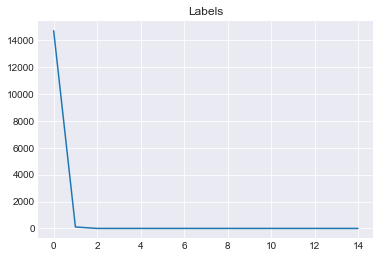

In [100]:
# Figure: plotting the Transpot Block Size manual labeling 
xAxis = np.arange(len(labels))
plt.figure()
plt.plot(xAxis,labels)
plt.title('Labels')



In [102]:
labels

array([14691.,   108.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.,     0.,     0.,     0.,     0.,     0.])